<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/Train_DeepLearning_Network_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


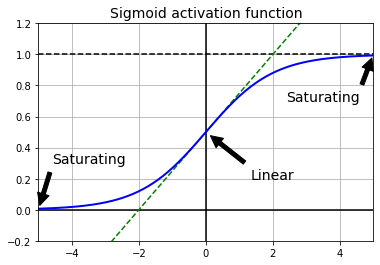

In [ ]:
def logit(z):
    return 1 / (1 + np.exp(-z))


z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [ ]:
#초기화 방법들
keras.layers.Dense(10, activation='relu', kernel_initializer=keras.initializers.he_normal)
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation='sigmoid', kernel_initializer=he_avg_init)

[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [ ]:
from scipy.special import erfc

# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화합니다
# (논문에 있는 식 14 참조):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale*elu(z, alpha)


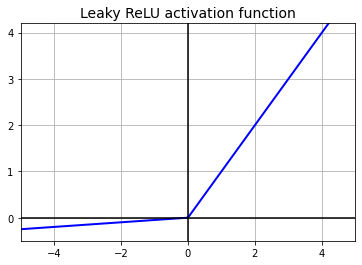

In [ ]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

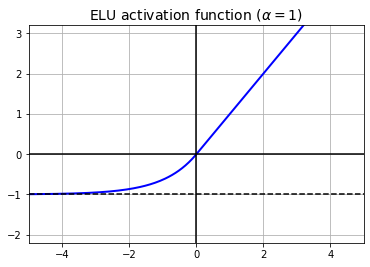

In [ ]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

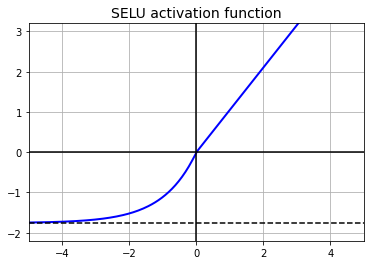

In [ ]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [ ]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print(X_train[0].shape)

4431872/4422102 [==============================] - 0s 0us/step
(28, 28)


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)


#Leaky ReLU 사용
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 2ms/step - loss: 1.3122 - accuracy: 0.6186 - val_loss: 0.9047 - val_accuracy: 0.7158
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8059 - accuracy: 0.7345 - val_loss: 0.7203 - val_accuracy: 0.7636
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6870 - accuracy: 0.7706 - val_loss: 0.6475 - val_accuracy: 0.7886
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6249 - accuracy: 0.7932 - val_loss: 0.5924 - val_accuracy: 0.8072
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5849 - accuracy: 0.8068 - val_loss: 0.5597 - val_accuracy: 0.8194
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5563 - accuracy: 0.8152 - val_loss: 0.5361 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5347 - accuracy: 0.8219 - val_loss: 0.5166 - val_accuracy:

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
#SELU 사용
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 19s 10ms/step - loss: 1.4098 - accuracy: 0.4563 - val_loss: 1.0157 - val_accuracy: 0.6286
Epoch 2/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8472 - accuracy: 0.6847 - val_loss: 0.7561 - val_accuracy: 0.7348
Epoch 3/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8056 - accuracy: 0.6983 - val_loss: 0.7390 - val_accuracy: 0.7166
Epoch 4/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7290 - accuracy: 0.7176 - val_loss: 0.7459 - val_accuracy: 0.7508
Epoch 5/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6148 - accuracy: 0.7710 - val_loss: 0.6452 - val_accuracy: 0.7764
Epoch 6/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5751 - accuracy: 0.7898 - val_loss: 0.5625 - val_accuracy: 0.7994
Epoch 7/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5323 - accuracy: 0.8058 - val_loss: 0.5094 - val_a

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 19s 9ms/step - loss: 1.9807 - accuracy: 0.2162 - val_loss: 1.7354 - val_accuracy: 0.3332
Epoch 2/20
1719/1719 [==============================] - 16s 9ms/step - loss: 1.3946 - accuracy: 0.4027 - val_loss: 1.2286 - val_accuracy: 0.4382
Epoch 3/20
1719/1719 [==============================] - 16s 9ms/step - loss: 1.0685 - accuracy: 0.5509 - val_loss: 0.9101 - val_accuracy: 0.6096
Epoch 4/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.9544 - accuracy: 0.5985 - val_loss: 0.8065 - val_accuracy: 0.6528
Epoch 5/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8682 - accuracy: 0.6345 - val_loss: 0.8774 - val_accuracy: 0.6328
Epoch 6/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8094 - accuracy: 0.6607 - val_loss: 0.7068 - val_accuracy: 0.7090
Epoch 7/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7804 - accuracy: 0.6741 - val_loss: 0.8724 - val_ac

In [ ]:
#BatchNomalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_207 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_208 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [ ]:
#파라미터 확인하기, 784 * 4 = 3136
#non - trainable 1568 + 600 + 200 = 2368 -> 역전파로 훈련되지 않음... 데이터로 훈련됨
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
#배치 정규화 층에 이동 파라미터가 있으므로 편향 제거
#활성화 함수 이전에 배치 정규화 층 구성
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0346 - accuracy: 0.6741 - val_loss: 0.6706 - val_accuracy: 0.7816
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6728 - accuracy: 0.7816 - val_loss: 0.5536 - val_accuracy: 0.8152
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5920 - accuracy: 0.8039 - val_loss: 0.5007 - val_accuracy: 0.8326
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5416 - accuracy: 0.8180 - val_loss: 0.4667 - val_accuracy: 0.8370
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5098 - accuracy: 0.8255 - val_loss: 0.4441 - val_accuracy: 0.8446
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4882 - accuracy: 0.8319 - val_loss: 0.4266 - val_accuracy: 0.8506
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4714 - accuracy: 0.8385 - val_loss: 0.4124 - val_accuracy:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.8649 - accuracy: 0.7164 - val_loss: 0.6075 - val_accuracy: 0.8068
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6106 - accuracy: 0.7923 - val_loss: 0.5230 - val_accuracy: 0.8274
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5531 - accuracy: 0.8106 - val_loss: 0.4878 - val_accuracy: 0.8364
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5181 - accuracy: 0.8233 - val_loss: 0.4636 - val_accuracy: 0.8442
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4947 - accuracy: 0.8297 - val_loss: 0.4483 - val_accuracy: 0.8490
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4788 - accuracy: 0.8340 - val_loss: 0.4348 - val_accuracy: 0.8546
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4657 - accuracy: 0.8389 - val_loss: 0.4246 - val_accuracy:

In [ ]:
#전이 학습!

def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

#샌달과 셔츠를 제외한 데이터셋 , 셔츠인지 샌달인지 나누는 데이터셋
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

#적은 데이터셋
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
#샌달 셔츠 제외한 분류기
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation=keras.activations.selu))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A.h5")

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5740 - accuracy: 0.8178 - val_loss: 0.3801 - val_accuracy: 0.8652
Epoch 2/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.3528 - accuracy: 0.8768 - val_loss: 0.3230 - val_accuracy: 0.8879
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3168 - accuracy: 0.8886 - val_loss: 0.2937 - val_accuracy: 0.8971
Epoch 4/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.2980 - accuracy: 0.8950 - val_loss: 0.2832 - val_accuracy: 0.9028
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2854 - accuracy: 0.9009 - val_loss: 0.2734 - val_accuracy: 0.9076
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2762 - accuracy: 0.9043 - val_loss: 0.2682 - val_accuracy: 0.9098
Epoch 7/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.2683 - accuracy: 0.9072 - val_loss: 0.2655 - val_accuracy:

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation=keras.activations.selu))
model_B.add(keras.layers.Dense(1, activation=keras.activations.sigmoid))

model_B.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))


Epoch 1/20
7/7 [==============================] - 1s 40ms/step - loss: 0.5516 - accuracy: 0.7300 - val_loss: 0.4668 - val_accuracy: 0.7860
Epoch 2/20
7/7 [==============================] - 0s 14ms/step - loss: 0.3959 - accuracy: 0.8450 - val_loss: 0.3576 - val_accuracy: 0.8702
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2998 - accuracy: 0.9050 - val_loss: 0.2917 - val_accuracy: 0.9016
Epoch 4/20
7/7 [==============================] - 0s 14ms/step - loss: 0.2431 - accuracy: 0.9300 - val_loss: 0.2457 - val_accuracy: 0.9290
Epoch 5/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2028 - accuracy: 0.9400 - val_loss: 0.2137 - val_accuracy: 0.9422
Epoch 6/20
7/7 [==============================] - 0s 14ms/step - loss: 0.1733 - accuracy: 0.9600 - val_loss: 0.1901 - val_accuracy: 0.9452
Epoch 7/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1532 - accuracy: 0.9600 - val_loss: 0.1721 - val_accuracy: 0.9503
Epoch 8/20
7/7 [===========

In [ ]:
#model A 를 그대로 사용하면 원본 모델 가중치가 변경이된다.
#클론해서 사용함

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))
model_B_on_A.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_216 (Dense)           (None, 300)               235500    
                                                                 
 dense_217 (Dense)           (None, 100)               30100     
                                                                 
 dense_218 (Dense)           (None, 50)                5050      
                                                                 
 dense_219 (Dense)           (None, 50)                2550      
                                                                 
 dense_220 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 1)                

In [ ]:
#레이어를 동결시킨다.
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=[X_valid_B, y_valid_B])

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-4),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 35ms/step - loss: 0.7096 - accuracy: 0.5550 - val_loss: 0.7054 - val_accuracy: 0.5649
Epoch 2/4
7/7 [==============================] - 0s 15ms/step - loss: 0.6469 - accuracy: 0.6600 - val_loss: 0.6482 - val_accuracy: 0.6359
Epoch 3/4
7/7 [==============================] - 0s 15ms/step - loss: 0.5937 - accuracy: 0.6950 - val_loss: 0.5975 - val_accuracy: 0.6785
Epoch 4/4
7/7 [==============================] - 0s 17ms/step - loss: 0.5468 - accuracy: 0.7350 - val_loss: 0.5544 - val_accuracy: 0.7140
Epoch 1/16
7/7 [==============================] - 1s 36ms/step - loss: 0.5126 - accuracy: 0.7550 - val_loss: 0.5319 - val_accuracy: 0.7373
Epoch 2/16
7/7 [==============================] - 0s 13ms/step - loss: 0.4909 - accuracy: 0.7650 - val_loss: 0.5113 - val_accuracy: 0.7606
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.4709 - accuracy: 0.7900 - val_loss: 0.4918 - val_accuracy: 0.7789
Epoch 4/16
7/7 [===============

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8865


[0.3315048813819885, 0.8865000009536743]

# 옵티마이저

In [29]:

#모멘텀 최적화
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
#네스트로프 최적화
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
#AdaGrad
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
#RMSProp
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9) #beta = rho
#Adam
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999) #beta1 : momentum, beta2 : gradient 평균 비율
#Nadam
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# 학습률 스케줄링


In [35]:
#거듭제곱 스케줄링
#케라스 업데이트 공식 : lr = lr0 / ( 1 + t / s ) ** c
#s = 1 / decay  -> s = 1000
optimizer = keras.optimizers.SGD(learning_rate=0.001, decay=1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6986 - accuracy: 0.7599 - val_loss: 0.5333 - val_accuracy: 0.8228
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5065 - accuracy: 0.8245 - val_loss: 0.4792 - val_accuracy: 0.8380
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4694 - accuracy: 0.8370 - val_loss: 0.4597 - val_accuracy: 0.8466
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4491 - accuracy: 0.8440 - val_loss: 0.4431 - val_accuracy: 0.8482
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4353 - accuracy: 0.8489 - val_loss: 0.4341 - val_accuracy: 0.8540
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4251 - accuracy: 0.8521 - val_loss: 0.4276 - val_accuracy: 0.8552
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8555 - val_loss: 0.4207 - val_accuracy:

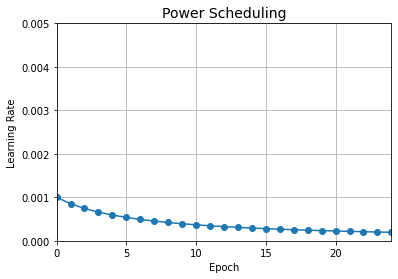

In [40]:
import math

learning_rate = 0.001
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.005])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [42]:
#지수 기반 스케줄링
# lr = lr0 * 0.1**(epoch / s)

def exponential_decay(lr, s):
    def exponential_decay_fn(epoch):
        return lr * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

#여기 함수를 넣어야되서 decay함수를 반환하는 함수를 만들었음.
#함수의 인자로 에폭과 현재 학습률을 받을 수 있음.
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
#selu라서 표준화된 데이터를 넣음
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9254 - accuracy: 0.7436 - val_loss: 0.9771 - val_accuracy: 0.6756 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7128 - accuracy: 0.7920 - val_loss: 0.6836 - val_accuracy: 0.8278 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6329 - accuracy: 0.8187 - val_loss: 0.7031 - val_accuracy: 0.8116 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5928 - accuracy: 0.8338 - val_loss: 0.5461 - val_accuracy: 0.8368 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5318 - accuracy: 0.8469 - val_loss: 0.5740 - val_accuracy: 0.8364 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4746 - accuracy: 0.8624 - val_loss: 0.5564 - val_accuracy: 0.8552 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 5s

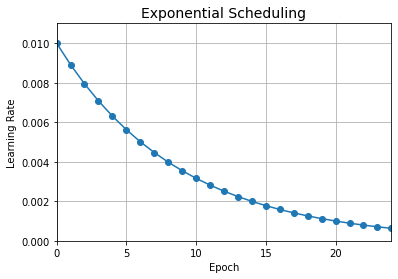

In [43]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [45]:
#사용자 지정 콜백함수로 에폭이 아니라 매 반복마다 학습률 업데이트

def exponential_decay(s):
    def exponential_decay_fn(epoch, lr):
        return lr * 0.1**(1 / s)
    return exponential_decay_fn

K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s
        self.lr = []
    #한번의 에폭에 1719번의 배치반복을 수행함
    def on_batch_begin(self, batch, logs=None):
        # 노트: 에포크마다 `batch` 매개변수가 재설정됩니다
        #현재 학습률
        lr = K.get_value(self.model.optimizer.lr)
        self.lr.append(lr)
        #학습률 갱신
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # 20 에포크 동안 스텝 횟수 (배치 크기 = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8058 - accuracy: 0.7669 - val_loss: 0.7807 - val_accuracy: 0.7400 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6545 - accuracy: 0.8019 - val_loss: 0.5832 - val_accuracy: 0.8228 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5647 - accuracy: 0.8268 - val_loss: 0.6790 - val_accuracy: 0.8130 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5294 - accuracy: 0.8334 - val_loss: 0.4973 - val_accuracy: 0.8536 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4808 - accuracy: 0.8499 - val_loss: 0.5565 - val_accuracy: 0.8582 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4417 - accuracy: 0.8587 - val_loss: 0.4572 - val_accuracy: 0.8596 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 7s

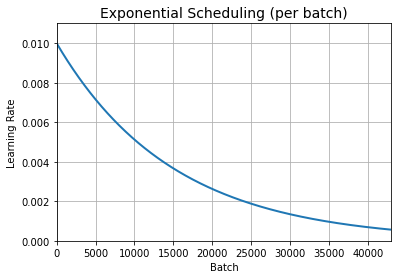

In [51]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lr = exp_decay.lr[:42968]
plt.plot(steps, lr, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()